In [7]:
#five number summary

#using pandas
import pandas as pd
df = pd.read_excel('carM.xlsx',sheet_name="carM")
five_num_summary = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
#location of specific rows and columns
five_num_summary=five_num_summary.applymap(lambda x:f"{x:.1f}")
print(five_num_summary)

#hardcode
min_value = df['Sales'].min()

q1 = df['Sales'].quantile(0.25)

median = df['Sales'].median()

q3 = df['Sales'].quantile(0.75)

max_value = df['Sales'].max()

print("For sales: ", f"Min: {min_value:.2f}, Q1: {q1:.2f}, Median: {median}, Q3: {q3}, Max: {max_value}")



       Price Mileage  Sales
min  15000.0     6.0  170.0
25%  20000.0    12.0  210.0
50%  22500.0    15.0  227.5
75%  25000.0    18.0  245.0
max  30000.0    21.0  290.0
210.0
For sales:  Min: 170.00, Q1: 210.00, Median: 227.5, Q3: 245.0, Max: 290


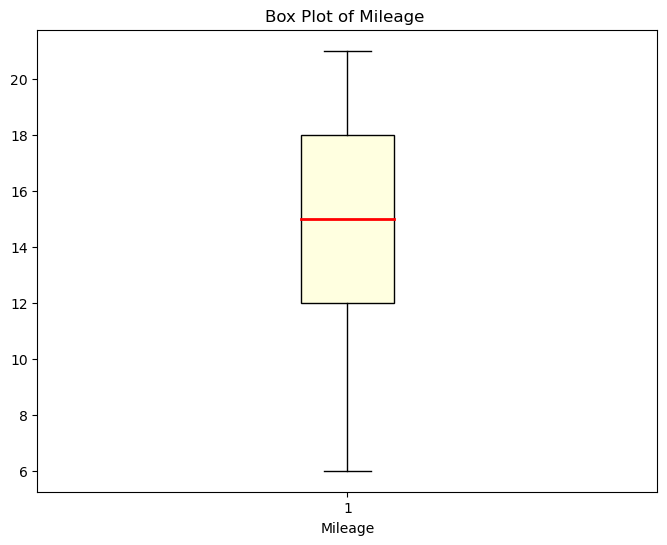


Five Number Summary for 'Mileage':
min     6.0
25%    12.0
50%    15.0
75%    18.0
max    21.0
Name: Mileage, dtype: float64


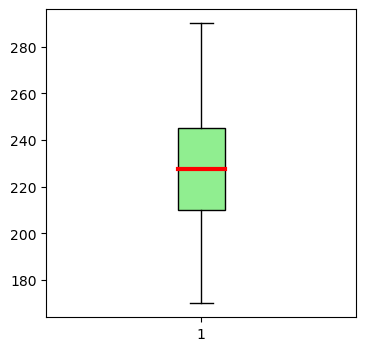

In [14]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel('carM.xlsx',sheet_name="carM")


plt.figure(figsize=(8, 6))
plt.boxplot(df['Mileage'], patch_artist=True, boxprops=dict(facecolor='lightyellow', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Box Plot of Mileage ')
plt.xlabel('Mileage')
plt.show()

five_num_mileage = df['Mileage'].describe()[['min', '25%', '50%', '75%', 'max']]

print("\nFive Number Summary for 'Mileage':")
print(five_num_mileage)

plt.figure(figsize=(4,4))
plt.boxplot(df['Sales'],patch_artist=True,boxprops=dict(facecolor='lightgreen',color='black'),
           medianprops=dict(color='red',linewidth=3))
plt.show()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('CarM.xlsx',sheet_name="carM")

print(df)
print("\n")

x_price = df['Price']
y_mileage = df['Mileage']

def calculate_covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    covariance = sum((x - x_mean) * (y - y_mean)) / (len(x) - 1)
    return covariance

def calculate_correlation(x, y):
    covariance = calculate_covariance(x, y)
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    correlation = covariance / (std_x * std_y)
    return correlation

cov_price_mileage_manual = calculate_covariance(x_price, y_mileage)
corr_price_mileage_manual = calculate_correlation(x_price, y_mileage)

cov_matrix = df.cov(numeric_only=True)
corr_matrix = df.corr(numeric_only=True)

cov_price_mileage_pandas = cov_matrix.loc['Price', 'Mileage']
corr_price_mileage_pandas = corr_matrix.loc['Price', 'Mileage']

print("Covariance Results:")
print(f"Covariance between Price and Mileage (Manual): {cov_price_mileage_manual:.2f}")
print(f"Covariance between Price and Mileage (Pandas): {cov_price_mileage_pandas:.2f}")
print("\n")

print("Correlation Results:")
print(f"Correlation between Price and Mileage (Manual): {corr_price_mileage_manual:.2f}")
print(f"Correlation between Price and Mileage (Pandas): {corr_price_mileage_pandas:.2f}")
print("\n")


Dataset:
   Mileage (km/l)  Price (lakhs)  Sales (units)
0              15            5.0            250
1              12            7.5            200
2              18            4.5            300
3              14            6.0            180
4              16            8.0            220
5              10            9.5            150
6              13            7.0            210
7              17            5.5            270
8              11            6.5            190
9              19            4.0            320


Covariance Results:
Covariance between Price and Mileage (Manual): -3.97
Covariance between Price and Mileage (Pandas): -3.97


Correlation Results:
Correlation between Price and Mileage (Manual): -0.77
Correlation between Price and Mileage (Pandas): -0.77




In [20]:
# handling missing values

import pandas as pd

# Load the dataset from 'miss.csv'
df = pd.read_excel('carM.xlsx',sheet_name="miss")

# Print the original dataset
print("Original Dataset:")
print(df)
print("\n")

# 1. Checking for missing values
print("Checking for Missing Values:")
print(df.isnull().sum())
print("\n")

# 2. Dropping missing values
df_dropped = df.dropna()
print("Dataset After Dropping Missing Values:")
print(df_dropped)
print("\n")

# 3. Filling with Median 
df_filled_median = df.fillna(df.median(numeric_only=True))
print("Dataset After Filling Missing Values with Median:")
print(df_filled_median)
print("\n")

# 4. Filling with Mean 
df_filled_mean = df.fillna(df.mean(numeric_only=True))
df_filled_mean = df_filled_mean.applymap(lambda x: f"{x:.2f}")
print("Dataset After Filling Missing Values with Mean:")
print(df_filled_mean)
print("\n")

# 5. with  constant (e.g., 0)
df_filled_constant = df.fillna(0)
print("Dataset After Filling Missing Values with Constant (0):")
print(df_filled_constant)
print("\n")

# 6. Forward Fill
df_forward_fill = df.ffill()
print("Dataset After Forward Filling Missing Values:")
print(df_forward_fill)
print("\n")





Original Dataset:
      Price  Mileage  Sales
0   20000.0     15.0  250.0
1   18000.0     18.0  230.0
2   25000.0      NaN  210.0
3       NaN     16.0  240.0
4   30000.0     10.0  200.0
5   15000.0      NaN    NaN
6       NaN     17.0  260.0
7   19000.0     14.0  220.0
8   28000.0     11.0  190.0
9   22000.0     19.0  250.0
10  30000.0      NaN  180.0
11      NaN     13.0  210.0


Checking for Missing Values:
Price      3
Mileage    3
Sales      1
dtype: int64


Dataset After Dropping Missing Values:
     Price  Mileage  Sales
0  20000.0     15.0  250.0
1  18000.0     18.0  230.0
4  30000.0     10.0  200.0
7  19000.0     14.0  220.0
8  28000.0     11.0  190.0
9  22000.0     19.0  250.0


Dataset After Filling Missing Values with Median:
      Price  Mileage  Sales
0   20000.0     15.0  250.0
1   18000.0     18.0  230.0
2   25000.0     15.0  210.0
3   22000.0     16.0  240.0
4   30000.0     10.0  200.0
5   15000.0     15.0  220.0
6   22000.0     17.0  260.0
7   19000.0     14.0  220.0
8